In [ ]:
#Importing Libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

In [2]:
#Reading the data 
data =  pd.read_csv('housing_data.csv')


In [3]:
data.shape

(34857, 21)

In [4]:

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [ ]:
#Date has to be modified
#Post code is float, it should be category


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [6]:
data['Postcode']=data['Postcode'].astype('object')
data['Propertycount']=data['Propertycount'].astype('object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null object
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null object
dtypes: float64(10), int64(1), object(10)
memory usage: 5.6+ MB

In [8]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350


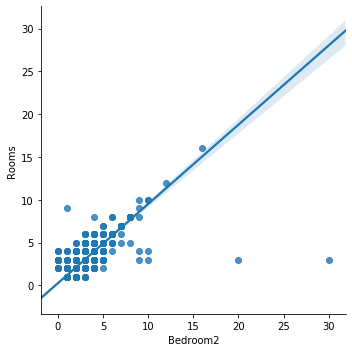

In [9]:
sns.lmplot(data = data , x='Bedroom2', y = 'Rooms')

In [10]:
data.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
Rooms,1.000000,0.465238,0.271511,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235
Price,0.465238,1.000000,-0.211384,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874
Distance,0.271511,-0.211384,1.000000,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946
Bedroom2,0.946755,0.430275,0.269524,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164
Bathroom,0.611826,0.429878,0.126201,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531
Car,0.393878,0.201803,0.241835,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213
Landsize,0.037402,0.032748,0.060862,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582
BuildingArea,0.156229,0.100754,0.076301,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143
YearBuilt,-0.012749,-0.333306,0.323059,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175
Lattitude,0.004872,-0.215607,-0.100417,0.003447,-0.059183,-0.009020,0.025318,0.017155,0.091592,1.000000,-0.345589


In [11]:
data.drop(['Bedroom2'],axis=1,inplace=True)

In [12]:
data.BuildingArea.value_counts(ascending=True).head()

664.00     1
2002.00    1
196.10     1
130.52     1
157.85     1
Name: BuildingArea, dtype: int64

In [13]:
data[data.BuildingArea==1].shape

(15, 20)

In [14]:
data.shape

(34857, 20)

In [15]:
data= data[~(data['BuildingArea']<1)]
print(data.shape)

(34780, 20)


In [16]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [17]:
##we are done until here

In [18]:
data[data.BuildingArea>35000].shape

(1, 20)

In [19]:
data['BuildingArea'].replace(44515.0,445,inplace=True)
data['YearBuilt'].replace(2106,2016,inplace=True)

In [20]:
#Missing value analysis


In [21]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7594
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     21115
YearBuilt        19304
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [22]:
data['Price'].mean()

1050129.9797689987

In [ ]:
#Replacing missing values
# price_mean = data['Price'].fillna(data['Price'].mean())
# #ba = Building Area
# ba_mean=data['BuildingArea'].fillna(data['BuildingArea'].mean())

# price_median=data['Price'].fillna(data['Price'].median())

# ba_mean=data['BuildingArea'].fillna(data['BuildingArea'].median())


In [24]:
data['Price']=data['Price'].fillna(data['Price'].median())

data['Landsize']=data['Landsize'].fillna(data['Landsize'].median())

data['Distance']=data['Distance'].fillna(data['Distance'].median())

data['BuildingArea']=data['BuildingArea'].fillna(data['BuildingArea'].median())

data['Lattitude']=data['Lattitude'].fillna(data['Lattitude'].median())

data['Longtitude']=data['Longtitude'].fillna(data['Longtitude'].median())

data['YearBuilt']=data['YearBuilt'].fillna(data['YearBuilt'].median())

data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bathroom         8226
Car              8726
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [25]:
data['Postcode']=data['Postcode'].fillna(data['Postcode'].mode()[0])
data['Bathroom']=data['Bathroom'].fillna(data['Bathroom'].mode()[0])
data['Car']=data['Car'].fillna(data['Car'].mode()[0])
data['CouncilArea']=data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
data['Regionname']=data['Regionname'].fillna(data['Regionname'].mode()[0])
data['Propertycount']=data['Propertycount'].fillna(data['Propertycount'].mode()[0])

In [26]:
data['house_age']= 2019-data['YearBuilt']

In [28]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'house_age'],
      dtype='object')

In [27]:
#Model
#We will see the columns and drop the columns which we think are not necessary and keep the 
#columns which will be used for modelling
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,house_age
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,49.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,49.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,119.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,49.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,119.0


In [33]:
cols = ['Suburb','Address','Type','Method','SellerG','CouncilArea','Regionname']
for col in cols:
    print(col,data[col].nunique())
    

Suburb 350
Address 33936
Type 3
Method 9
SellerG 388
CouncilArea 33
Regionname 8


In [35]:
# 350 suburbs
# 33936 addresses
# 388 sellers
# 33 council area
# these can be dropped
drop_cols = ['Suburb','Address','SellerG','CouncilArea','Method']
data.drop(drop_cols,axis=1,inplace=True)



In [38]:
data.drop(['Date'],axis=1,inplace=True)
data_upd= pd.get_dummies(data,columns=['Type','Regionname'])
data_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 24 columns):
Rooms                                    34780 non-null int64
Price                                    34780 non-null float64
Distance                                 34780 non-null float64
Postcode                                 34780 non-null float64
Bathroom                                 34780 non-null float64
Car                                      34780 non-null float64
Landsize                                 34780 non-null float64
BuildingArea                             34780 non-null float64
YearBuilt                                34780 non-null float64
Lattitude                                34780 non-null float64
Longtitude                               34780 non-null float64
Propertycount                            34780 non-null float64
house_age                                34780 non-null float64
Type_h                                   34780 non-null uint8

In [39]:
X= data_upd.drop("Price",axis=1)
Y=data_upd['Price'].copy()

scalar =RobustScaler()
data_upd = scalar.fit_transform(data_upd.astype(np.float64))

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=41)



In [41]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train,y_train)


RandomForestRegressor(n_jobs=-1)

In [45]:
models=[('DT',tree),('RF',forest)]
for _,model in models:
    print(model)


DecisionTreeRegressor()
RandomForestRegressor(n_jobs=-1)


In [42]:
models=[('DT',tree),('RF',forest)]
from sklearn.metrics import mean_squared_error
for i , model in models:
    predictions = model.predict(x_test)
    MSE=mean_squared_error(y_test,predictions)
    RMSE=np.sqrt(MSE)
    print(model,RMSE)
    

DecisionTreeRegressor() 522317.5522859625
RandomForestRegressor(n_jobs=-1) 392449.34115871094


In [ ]:
## Fine tuning our model using GRID Search and Cross validation

forest = RandomForestRegressor()


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid=[
{"n_estimators":[150,200],"max_features":[15,10],
"max_depth":[10,15,20]}
]
grid_search_forest = GridSearchCV(forest,param_grid,cv=10,scoring="neg_mean_squared_error")
grid_search_forest.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'max_depth': [10, 15, 20], 'max_features': [15, 10],
                          'n_estimators': [150, 200]}],
             scoring='neg_mean_squared_error')

In [51]:
grid_search_forest.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [100, 150]}],
             scoring='neg_mean_squared_error')

In [52]:
cv_res=grid_search_forest.cv_results_


In [55]:
for mean_score, params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score),params)

423867.43295634835 {'max_depth': 10, 'max_features': 5, 'n_estimators': 100}
423691.1232585704 {'max_depth': 10, 'max_features': 5, 'n_estimators': 150}
421985.8484271371 {'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
421690.9238767855 {'max_depth': 10, 'max_features': 10, 'n_estimators': 150}
428785.00316266157 {'max_depth': 50, 'max_features': 5, 'n_estimators': 100}
428512.6664343857 {'max_depth': 50, 'max_features': 5, 'n_estimators': 150}
431117.880402291 {'max_depth': 50, 'max_features': 10, 'n_estimators': 100}
432020.49909292266 {'max_depth': 50, 'max_features': 10, 'n_estimators': 150}
430390.0656997303 {'max_depth': None, 'max_features': 5, 'n_estimators': 100}
428742.0037476543 {'max_depth': None, 'max_features': 5, 'n_estimators': 150}
431791.34503857006 {'max_depth': None, 'max_features': 10, 'n_estimators': 100}
431339.3706775852 {'max_depth': None, 'max_features': 10, 'n_estimators': 150}


In [58]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=15, max_features=10, n_estimators=200,
                      n_jobs=-1)

In [ ]:
Education:
10
12
Degree


In [ ]:

10 12 Degree

In [ ]:
data['Price']= data['Price'].fillna(data['Price'].median())
data['Landsize']= data['Landsize'].fillna(data['Landsize'].median())
#Similarly, fill the only missing value of  all the other numeric values
data['Distance'] = data['Distance'].fillna(data['Distance'].median())
data['BuildingArea']= data['BuildingArea'].fillna(data['BuildingArea'].median())
data['Lattitude']= data['Lattitude'].fillna(data['Lattitude'].median())
data['Longtitude']= data['Longtitude'].fillna(data['Longtitude'].median())
data['YearBuilt']= data['YearBuilt'].fillna(data['YearBuilt'].median())
data.isnull().sum()

In [ ]:
data['Bathroom']= data['Bathroom'].fillna(data['Bathroom'].mode()[0])
data['Car']= data['Car'].fillna(data['Car'].mode()[0])
data['CouncilArea']= data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
data['Regionname']= data['Regionname'].fillna(data['Regionname'].mode()[0])
data['Propertycount']= data['Propertycount'].fillna(data['Propertycount'].mode()[0])
data['Postcode']= data['Postcode'].fillna(data['Postcode'].mode()[0])
data.isnull().sum()

In [ ]:
data['Bathroom'] = pd.to_numeric(data['Bathroom']).round(0).astype(int)
data['Car'] = pd.to_numeric(data['Car']).round(0).astype(int)

In [ ]:
data['houseAge'] = 2019-data['YearBuilt']

In [ ]:
data.info()

In [ ]:
#dummy variable
hD= pd.get_dummies(data, columns= ['Type', 'Regionname', 'season'])
#drop useless variables
hD= hD.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'isOutlierPrice', 'isOutlierDistance',
            'YearBuilt', 'data', 'doy', 'month', 'month_year', 'Price_cut'], axis=1)
#check variables
hD.info()